# Telco Churn Prediction: Feature Engineering

## 1. Introduction

### 1.1 Notebook Goal & EDA Insight

The purpose of this notebook is to transform the raw features within the Telco Churn dataset into a set of high-quality, predictive variables. Effective feature engineering allows our machine learning models to better capture the underlying patterns related to customer churn, significantly impacting model performance.

## 2. Initial Setup

### 2.1 Library Imports and Configurations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Display settings allow complete dataframe columns to be seen
pd.set_option('display.max_columns', None)

### 2.2 Cleaned Data

In [2]:
df = pd.read_csv("../data/processed/churn_clean.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


The above dataset shows Churn (target variable) as a numerical value and we see that the customer_ID has dropped as this gives us no predictive information

## 3. Encoding Categorical Features

### 3.1 Binary encoding

We convert binary columns (e.g. Yes/No columns) such as Partner, Dependents, PhoneService, Churn target variable into 1s and 0s, as machine learning algorithm prefer numerical inputs.

In [3]:
# Ensure categorical columns have binary values transformed from previous EDA section
print(df['Partner'].unique())
print(df['Dependents'].unique())
print(df['gender'].unique())
print(df['MultipleLines'].unique())
print(df['PhoneService'].unique())
print(df['OnlineSecurity'].unique())
print(df['OnlineBackup'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingMovies'].unique())
print(df['PaperlessBilling'].unique())

['Yes' 'No']
['No' 'Yes']
['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']


In [4]:
binary_cols = ['Partner','Dependents', 'MultipleLines','PhoneService','OnlineSecurity',
               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in binary_cols:
    df[col+'_binary'] = df[col].map({'Yes':1,'No':0})

df['gender_binary'] = df['gender'].map({'Female':0,'Male':1})

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_binary,Dependents_binary,MultipleLines_binary,PhoneService_binary,OnlineSecurity_binary,OnlineBackup_binary,DeviceProtection_binary,TechSupport_binary,StreamingTV_binary,StreamingMovies_binary,PaperlessBilling_binary,gender_binary
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,0,0,1,1,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,0,0,1,1,1,0,0,0,0,1,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1,0,1,1,0,0,0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,1,0


We see the addition of new columns, that represent a binary enconding of previous 'yes', 'no' categories.

### 3.2 One-hot encoding

Most algorithms cannot operate on text labels given eg for 'Contract' or 'InternetService'. One-hot encoding converts text categories into numerical arrays they can process.

In [6]:
df['is_month_to_month'] = (df['Contract'] == 'Month-to-month').astype(int)
df['is_one_year'] = (df['Contract'] == 'One year').astype(int)
df['is_two_year'] = (df['Contract'] == 'Two year').astype(int)
df['internet_service_fiber'] = (df['InternetService'] == 'Fiber optic').astype(int)
df['internet_service_dsl'] = (df['InternetService'] == 'DSL').astype(int)
df['internet_service_none'] = (df['InternetService'] == 'No').astype(int)
df['is_electronic_check'] = (df['PaymentMethod'] == 'Electronic check').astype(int)
df['is_mailed_check'] = (df['PaymentMethod'] == 'Mailed check').astype(int)
df['is_bank_transfer'] = (df['PaymentMethod'] == 'Bank transfer (automatic)').astype(int)
df['is_credit_card'] = (df['PaymentMethod'] == 'Credit card (automatic)').astype(int)

## 4. Feature Creation / Engineering

### 4.1 Tenure Bins

From the EDA notebooks, we saw that churn is mainly concentrated at the beginning of a tenure from the boxplots. To investigate this further we see from the plot below that as tenure increases the churn rate levels off, after roughly one year. A huge decrease is seen in the first 6 months, for this reason we split into 6 month buckets 

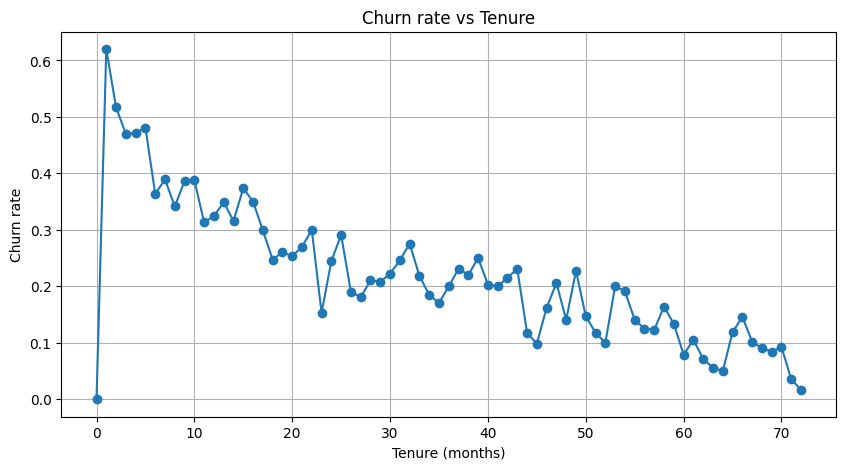

In [7]:
# Compute churn rate for each tenure month
tenure_churn = df.groupby('tenure')['Churn'].mean()

# Plot churn rate vs tenure
plt.figure(figsize=(10,5))
plt.plot(tenure_churn.index, tenure_churn.values, marker='o')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn rate')
plt.title('Churn rate vs Tenure')
plt.grid(True)
plt.show()

In [8]:
df['tenure_bins'] = pd.cut(df['tenure'], bins=[0, 6, 12, 18, 24, df['tenure'].max()], labels=['0-6','6-12','12-18','18-24', '24+'])

/var/folders/m4/cww2wk190tv1tppb05xvym140000gn/T/ipykernel_56932/2677425200.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_bins')['Churn'].mean().sort_index().plot(kind='bar')


Text(0.5, 1.0, 'Churn rate by tenure bucket')

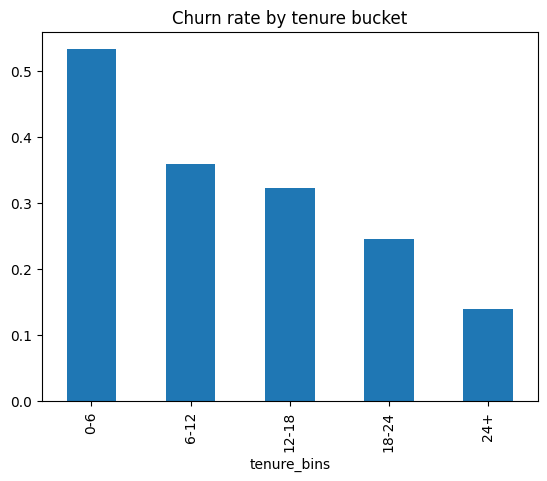

In [9]:
df.groupby('tenure_bins')['Churn'].mean().sort_index().plot(kind='bar')
plt.title("Churn rate by tenure bucket")

In [10]:
df.groupby('tenure_bins')['Churn'].mean()

/var/folders/m4/cww2wk190tv1tppb05xvym140000gn/T/ipykernel_56932/2144042395.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_bins')['Churn'].mean()


tenure_bins
0-6      0.533333
6-12     0.358865
12-18    0.322993
18-24    0.245798
24+      0.140360
Name: Churn, dtype: float64

### 4.2 Services used count

We create a services_count feature, a derived numerical variable created to capture the number of services adopted. By summing the individual binary service columns (e.g., Online Security, Tech Support, Streaming), we understand stickiness of customers when adopting more services Customers with a higher ServicesCount are less likely to churn because the switching cost is higher. This is shown by the graph below where higher service counts lead to lower churn rates, though can also be a fact of lless customers with multiple services.

In [11]:
service_cols = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

df['services_count'] = df[service_cols].apply(lambda x: (x=='Yes').sum(), axis=1)

<Axes: xlabel='services_count', ylabel='Churn'>

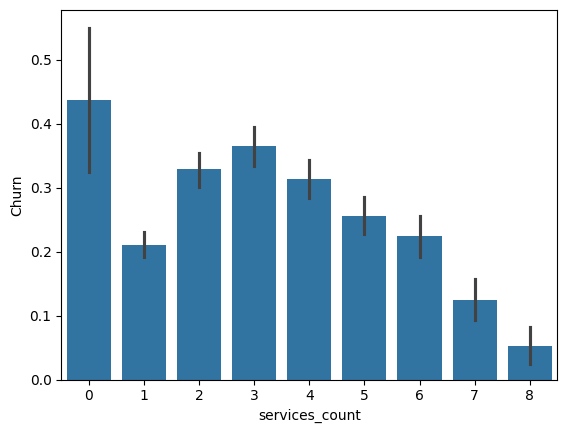

In [12]:
sns.barplot(x='services_count', y='Churn', data=df)

### 4.3 Average Monthly Charge

We add an average charge per month, based on total charges / tenure. This gives an idea of the average spend by customer each month since joining.


In [13]:
df['AvgMonthlyCharge'] = df['TotalCharges'] / df['tenure']

In [14]:
# We find that where tenure is 0, we have Avg monthly charge and tenure_bins as NaN
df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_binary,Dependents_binary,MultipleLines_binary,PhoneService_binary,OnlineSecurity_binary,OnlineBackup_binary,DeviceProtection_binary,TechSupport_binary,StreamingTV_binary,StreamingMovies_binary,PaperlessBilling_binary,gender_binary,is_month_to_month,is_one_year,is_two_year,internet_service_fiber,internet_service_dsl,internet_service_none,is_electronic_check,is_mailed_check,is_bank_transfer,is_credit_card,tenure_bins,services_count,AvgMonthlyCharge
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,NaN,4,NaN
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,NaN,1,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0,1,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,NaN,6,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,0.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,NaN,2,NaN
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,NaN,5,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,0.0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,NaN,1,NaN
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,0.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,NaN,2,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,0.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,NaN,1,NaN
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,0.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,NaN,1,NaN
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,NaN,6,NaN


Having null values will not work with our model, therefore the correct way to deal with this would be to set montly average charges to 0 and allocate these NaN tenure bins to the 0-6 bin set.

In [15]:
df['AvgMonthlyCharge'] = df['AvgMonthlyCharge'].fillna(0)
new_fill_category = '0-6'
df['tenure_bins'] = df['tenure_bins'].fillna(new_fill_category)

### 4.4 Charge difference (AvgMonthly vs Monthly)

A positive value means the customer's current bill is significantly higher than their historical average, suggesting a recent price increase or end of a promotion, which is a key churn driver.


In [16]:
df['charge_diference'] = df['AvgMonthlyCharge'] - df['MonthlyCharges']

### 4.5 High Value Clients

Find out top 20% of high value clients to understand their churn behavior.


In [17]:
# 1. Calculate the 80th percentile threshold for TotalCharges
threshold = df['TotalCharges'].quantile(0.80)

# 2. Create the is_high_value flag
df['is_high_value'] = (df['TotalCharges'] >= threshold).astype(int)

# Distriutionbelow correctly shows ~20% high value customers
print(df['is_high_value'].value_counts(normalize=True))

is_high_value
0    0.799943
1    0.200057
Name: proportion, dtype: float64


## 5. Feature Transformation

### 5.1 Scaling numerical features

Scaling numerical features is an important preprocessing step in the Telco Customer Churn dataset because the dataset contains numeric variables with different ranges and units, such as MonthlyCharge, AvgMonthly Charge and TotalCharges. It allows for all features to be considered fairly, speed up and stabalise gradient based algorithms as well as improving accuracy.

In [18]:
numerical_cols = ['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Scaled Numerical Features:")
print(df[numerical_cols].head())

Scaled Numerical Features:
   MonthlyCharges  TotalCharges  AvgMonthlyCharge
0       -1.160323     -0.992611         -1.151302
1       -0.259629     -0.172165         -0.301458
2       -0.362660     -0.958066         -0.350966
3       -0.746535     -0.193672         -0.786053
4        0.197365     -0.938874          0.367602


## 6. Feature Selection

The final step in feature engineering is to select the most relevant and non-redundant set of features for model training. This process ensures that the model is trained on high-quality input, improving performance, training efficiency, and model interpretability.

### 6.1 Correlation Analysis

Correlation analysis allows for an initial assessment of the features, including checking for **multicollinearity**, high multicollinearity can lead to unstable model parameter estimates.

After checking the correlation of all features with the target variable, we identify and remove one feature from any pair with a high correlation coefficient (e.g. in this case, above 0.85) to ensure only independent, non-redundant information is passed to the next selection step.

In [19]:
# Select all numeric columns
numerical_types = ['int64', 'float64', 'int32', 'float32']
df_numeric = df.select_dtypes(include=numerical_types)

In [20]:
X = df_numeric.drop('Churn', axis=1) # All features
y = df_numeric['Churn']            # The target variable

In [21]:
# Calculate the correlation of all features with the target variable 'Churn'
correlation_with_churn = df_numeric.corr()['Churn'].sort_values(ascending=False)
print("Top 15 Features Correlated with Churn:")
print(correlation_with_churn.head(15))

Top 15 Features Correlated with Churn:
Churn                      1.000000
is_month_to_month          0.405103
internet_service_fiber     0.308020
is_electronic_check        0.301919
MonthlyCharges             0.193356
AvgMonthlyCharge           0.193301
PaperlessBilling_binary    0.191825
SeniorCitizen              0.150889
StreamingTV_binary         0.063228
StreamingMovies_binary     0.061382
MultipleLines_binary       0.040102
PhoneService_binary        0.011942
charge_diference           0.010348
gender_binary             -0.008612
DeviceProtection_binary   -0.066160
Name: Churn, dtype: float64


In [22]:
# Create a correlation matrix for the features
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8 (adjust threshold as needed)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Features to drop due to high correlation: {to_drop}")

# We drop features that are higly correlated
X_filtered = X.drop(columns=to_drop) 

Features to drop due to high correlation: ['AvgMonthlyCharge']


### 6.2 Recursive Feature Elimination with Cross-Validation (RFECV)

After removing highly correlated features, we employ **Recursive Feature Elimination with Cross-Validation (RFECV)** to find the absolute optimal subset of remaining features. RFECV repeatedly fits the model (Logistic Regression in this case) and removes the weakest feature until the optimal number of features is reached based on cross-validation accuracy.

In [23]:
# 1. Initialize the base model
model = LogisticRegression(solver='liblinear', random_state=42)

# 1. Initialize RFECV
rfecv = RFECV(
    estimator=model,        
    step=1,                 # Remove 1 feature at a time
    cv=5,                   # 5-fold cross-validation
    scoring='roc_auc'      # We use the 'roc_auc' metric as accuracy is not ideal for the imbalanced churn dataset
)

# 2. Fit the RFECV model
rfecv.fit(X_filtered, y)

# 3. Get the optimal feature set size
optimal_n_features = rfecv.n_features_

print(f"Optimal number of features: {optimal_n_features}")

# 4. Identify the final optimal features
final_optimal_features = X_filtered.columns[rfecv.support_]
print("\nFinal Optimal Feature Set:")
print(final_optimal_features.tolist())

Optimal number of features: 24

Final Optimal Feature Set:
['SeniorCitizen', 'tenure', 'TotalCharges', 'Dependents_binary', 'MultipleLines_binary', 'PhoneService_binary', 'OnlineSecurity_binary', 'OnlineBackup_binary', 'DeviceProtection_binary', 'TechSupport_binary', 'StreamingTV_binary', 'StreamingMovies_binary', 'PaperlessBilling_binary', 'gender_binary', 'is_month_to_month', 'is_two_year', 'internet_service_fiber', 'internet_service_none', 'is_electronic_check', 'is_mailed_check', 'is_bank_transfer', 'is_credit_card', 'services_count', 'is_high_value']


## 7 Save Engineered Features

In [24]:
# Saving final feature set and target variable
X_final = X_filtered[final_optimal_features]

### 7.1 Train-Test Split

We split the dataset into training and testing sets to train the model on one portion of the data while reserving unseen data to objectively evaluate its performance and prevent overfitting. It is important that the test data set remains unseen until evaluation.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, 
    y, 
    test_size=0.2, # Common test size used
    random_state=42, 
    stratify=y # This is crucial for imbalance: maintains the same proportion of Churn in both sets
)

### 7.2 Export the final datasetsm

Package into a paraquet file to allow easy reproducible file 

In [26]:
X_train.to_parquet('../data/processed/X_train.parquet', index=True)
X_test.to_parquet('../data/processed/X_test.parquet', index=True)

y_train.to_frame().to_parquet('../data/processed/y_train.parquet', index=True)
y_test.to_frame().to_parquet('../data/processed/y_test.parquet', index=True)